# 03 - Rhythm Spectrum Entropy across Groups

## Imports

In [2]:
import avn.timing as timing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

## Adult Birds

In [2]:
All_Birds = ["B145", "B236", "B258", "B385", "B402", "B447", 
             "B507", "G255", "G397", "G402", "G413", "G437", 
             "G439", "G524", "G528", "O144", "O254", "O421", 
             "O440", "O512", "R402", "R425", "R469", "S132", 
             "S421", "S525", "S528", "Y389", "Y397", "Y425", 
             "Y440", "B524", "O434", "Y433", "Y453"] 

#All_Birds should contain 35 bird IDs. Check: 
len(All_Birds)

35

### Calculate Rhythm Spectrum Entropy and CV peak freq

In [3]:
#initialize empty dataframe
rhythm_spect_feats = pd.DataFrame()

#loop over each bird
for Bird_ID in All_Birds:
    print(Bird_ID)
    #create RhythmAnalysis object
    rhythm_analysis = timing.RhythmAnalysis(Bird_ID)
    #set path to song files
    song_folder_path = 'E:\\Final_Bird_Dataset\\FP1_project_birds\\labeled_songs\\' + Bird_ID + "\\"
    #create rhythm spectrogram
    rhythm_spectrogram = rhythm_analysis.make_rhythm_spectrogram(song_folder_path = song_folder_path)
    #calculate entropy and peak freq cv
    entropy = rhythm_analysis.calc_rhythm_spectrogram_entropy()

    peak_frequencies = rhythm_analysis.get_refined_peak_frequencies(freq_range=3)
    peak_freq_cv = rhythm_analysis.calc_peak_frequency_cv()
    #save features in temporary df
    curr_df = pd.DataFrame({'Bird_ID' : Bird_ID, 
                            'rhythm_entropy' : [entropy], 
                            'peak_freq_cv' : [peak_freq_cv]})
    #append to df with all birds. 
    rhythm_spect_feats = pd.concat([rhythm_spect_feats, curr_df])


B145


KeyboardInterrupt: 

In [ ]:
rhythm_spect_feats.head(3)

,Bird_ID,rhythm_entropy,peak_freq_cv
0,B145,-0.131574,0.079447
0,B236,-0.175278,0.072484
0,B258,-0.468630,0.042943


In [ ]:
rhythm_spect_feats.to_csv('adult_rhythm_spectrum_features.csv')

## Juvenile Birds

In [ ]:
all_birds = glob.glob('E:\\Juveniles\\Single_day_per_juvenile\\*')
all_birds = [x.split('\\')[-1] for x in all_birds]
all_birds

['Y855_51',
 'S856_51',
 'Y856_50',
 'S855_51',
 'S833_51',
 'O833_51',
 'notag833_51',
 'O883_51',
 'R833_51',
 'O472_50',
 'Y472_50']

In [ ]:
#initialize empty dataframe
rhythm_spect_feats = pd.DataFrame()

#loop over each bird
for Bird_ID in all_birds:
    print(Bird_ID)
    #create RhythmAnalysis object
    rhythm_analysis = timing.RhythmAnalysis(Bird_ID)
    #set path to song files
    song_folder_path = 'E:\\Juveniles\\Single_day_per_juvenile\\' + Bird_ID + "\\"
    #create rhythm spectrogram
    rhythm_spectrogram = rhythm_analysis.make_rhythm_spectrogram(song_folder_path = song_folder_path)
    #calculate entropy and peak freq cv
    entropy = rhythm_analysis.calc_rhythm_spectrogram_entropy()

    peak_frequencies = rhythm_analysis.get_refined_peak_frequencies(freq_range=3)
    peak_freq_cv = rhythm_analysis.calc_peak_frequency_cv()
    #save features in temporary df
    curr_df = pd.DataFrame({'Bird_ID' : Bird_ID, 
                            'rhythm_entropy' : [entropy], 
                            'peak_freq_cv' : [peak_freq_cv]})
    #append to df with all birds. 
    rhythm_spect_feats = pd.concat([rhythm_spect_feats, curr_df])


Y855_51
S856_51
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
Y856_50
S855_51
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
S833_51
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. Fi

In [ ]:
rhythm_spect_feats.head(3)

,Bird_ID,rhythm_entropy,peak_freq_cv
0,Y855_51,-0.183136,0.092551
0,S856_51,-0.113872,0.046261
0,Y856_50,-0.211456,0.089261


In [ ]:
rhythm_spect_feats.to_csv('juvenile_rhythm_spectrum_features.csv')

## Comparing Groups

In [3]:
adult = pd.read_csv('adult_rhythm_spectrum_features.csv').drop(columns = 'Unnamed: 0')
adult = adult[adult.Bird_ID != 'S389']
all_birds = pd.read_csv("D:\\Final_Bird_Dataset\\old_Bird_list.csv")
adult = pd.merge(adult, all_birds[['Bird_ID', 'Condition']], on = 'Bird_ID')

group_dict = {'Isolate' : 'Isolate Adult', 
              'GFP' : 'Typical Adult', 
              'FP1_KD_pre_tut' : 'FP1 KD Adult', 
              'FP1_KD_post_tut' : 'Typical Adult'}
adult['Group'] = [group_dict[x] for x in adult.Condition]

In [4]:
juvenile = pd.read_csv('juvenile_rhythm_spectrum_features.csv').drop(columns = 'Unnamed: 0')
juvenile['Group'] = 'Juvenile'

In [5]:
all_rhythm_feats = pd.concat([adult[['Bird_ID', 'Group', 'rhythm_entropy', 'peak_freq_cv']], juvenile])

In [6]:
all_rhythm_feats.head()

,Bird_ID,Group,rhythm_entropy,peak_freq_cv
0,B145,Isolate Adult,-0.131574,0.079447
1,B236,Isolate Adult,-0.175278,0.072484
2,B258,Isolate Adult,-0.468630,0.042943
3,B385,Typical Adult,-0.268079,0.097509
4,B402,FP1 KD Adult,-0.297027,0.112586


In [7]:
all_rhythm_feats.Group = all_rhythm_feats.Group.astype('category').cat.set_categories(['Typical Adult', 'Isolate Adult', 'FP1 KD Adult', 'Juvenile'], ordered = True)

### Rhythm Spectrum Entropy

In [8]:
plt.rcParams.update({'font.size': 8})

(-0.8, 0.0999)

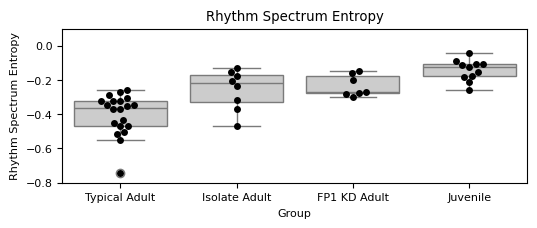

In [8]:
plt.figure(figsize = (6, 2))
sns.boxplot(data = all_rhythm_feats, x = 'Group', y = 'rhythm_entropy', color = '0.8')
sns.swarmplot(data = all_rhythm_feats, x = 'Group', y = 'rhythm_entropy', color = 'black', s = 5)
plt.ylabel('Rhythm Spectrum Entropy')
plt.title('Rhythm Spectrum Entropy')
plt.ylim(-0.8, 0.0999)

In [8]:
palette = sns.color_palette([sns.color_palette()[1], sns.color_palette()[0], sns.color_palette()[2], sns.color_palette()[4]])
palette

[(1.0, 0.4980392156862745, 0.054901960784313725),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353)]

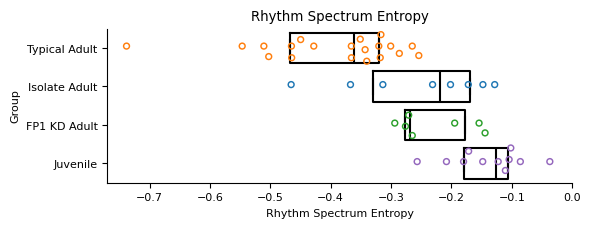

In [31]:
plt.figure(figsize = (6, 2))
sns.boxplot(data = all_rhythm_feats, y = 'Group', x = 'rhythm_entropy', fill = False, color = 'black', 
            fliersize=0, whis= 0, 
            legend = False)
sns.swarmplot(data = all_rhythm_feats, y = 'Group', x = 'rhythm_entropy', hue = 'Group', s = 8, marker = '$\circ$', 
              palette = palette )
plt.xlabel('Rhythm Spectrum Entropy')
plt.title('Rhythm Spectrum Entropy')

plt.xlim(-0.77, 0)
sns.despine()
plt.savefig('rhythm_spectrum_entropy_across_groups.svg')

In [7]:
plt.rcParams.update({'font.size': 18})

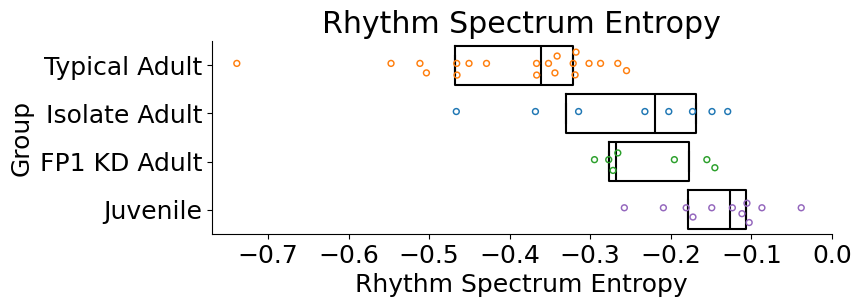

In [10]:
plt.figure(figsize = (8, 2.5))
sns.boxplot(data = all_rhythm_feats, y = 'Group', x = 'rhythm_entropy', fill = False, color = 'black', 
            fliersize=0, whis= 0, 
            legend = False)
sns.swarmplot(data = all_rhythm_feats, y = 'Group', x = 'rhythm_entropy', hue = 'Group', s = 8, marker = '$\circ$', 
              palette = palette )
plt.xlabel('Rhythm Spectrum Entropy')
plt.title('Rhythm Spectrum Entropy')

plt.xlim(-0.77, 0)
sns.despine()
plt.savefig('poster_rhythm_spectrum_entropy_across_groups.svg')

In [ ]:
all_rhythm_feats.groupby('Group').count()

,Bird_ID,rhythm_entropy,peak_freq_cv
Group,,,
Typical Adult,20,20,20
Isolate Adult,8,8,8
FP1 KD Adult,7,7,7
Juvenile,11,11,11


In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
isolates_AVN = all_rhythm_feats.rhythm_entropy[all_rhythm_feats.Group== 'Isolate Adult']
normal_AVN = all_rhythm_feats.rhythm_entropy[all_rhythm_feats.Group == 'Typical Adult']
FP1_AVN = all_rhythm_feats.rhythm_entropy[all_rhythm_feats.Group == 'FP1 KD Adult']
juvenile_AVN = all_rhythm_feats.rhythm_entropy[all_rhythm_feats.Group == 'Juvenile']

In [ ]:
fvalue, pvalue = f_oneway(isolates_AVN, normal_AVN, FP1_AVN, juvenile_AVN)
print(fvalue, pvalue)

16.995583093734815 2.2388716441345132e-07


In [ ]:
tukey = pairwise_tukeyhsd(endog = all_rhythm_feats['rhythm_entropy'], 
                          groups = all_rhythm_feats['Group'], 
                          alpha = 0.05)

print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
 FP1 KD Adult Isolate Adult   -0.025 0.9629  -0.164   0.114  False
 FP1 KD Adult      Juvenile   0.0896 0.2673 -0.0403  0.2195  False
 FP1 KD Adult Typical Adult  -0.1681 0.0024 -0.2861 -0.0502   True
Isolate Adult      Juvenile   0.1146 0.0822 -0.0103  0.2394  False
Isolate Adult Typical Adult  -0.1431 0.0077 -0.2555 -0.0308   True
     Juvenile Typical Adult  -0.2577    0.0 -0.3586 -0.1569   True
------------------------------------------------------------------


### CV Peak Frequency

In [9]:
all_rhythm_feats.head(2)

,Bird_ID,Group,rhythm_entropy,peak_freq_cv
0,B145,Isolate Adult,-0.131574,0.079447
1,B236,Isolate Adult,-0.175278,0.072484


(0.01, 0.16)

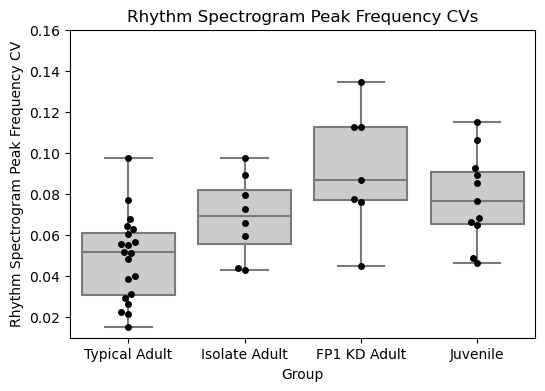

In [13]:
plt.figure(figsize = (6, 4))
sns.boxplot(data = all_rhythm_feats, x = 'Group', y = 'peak_freq_cv', color = '0.8')
sns.swarmplot(data = all_rhythm_feats, x = 'Group', y = 'peak_freq_cv', color = 'black', s = 5)
plt.ylabel('Rhythm Spectrogram Peak Frequency CV')
plt.title('Rhythm Spectrogram Peak Frequency CVs')
plt.ylim(0.01, 0.16)

In [11]:
palette = sns.color_palette([sns.color_palette()[1], sns.color_palette()[0], sns.color_palette()[2], sns.color_palette()[4]])
palette

[(1.0, 0.4980392156862745, 0.054901960784313725),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353)]

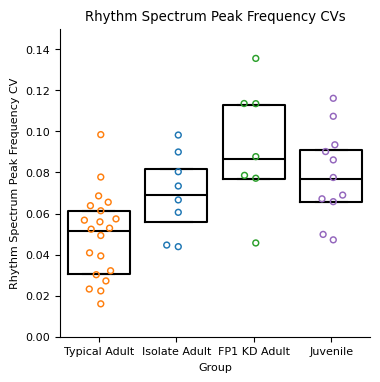

In [17]:
plt.figure(figsize = (4, 4 ))
sns.boxplot(data = all_rhythm_feats, x = 'Group', y = 'peak_freq_cv', fill = False, color = 'black', 
            fliersize=0, whis= 0, 
            legend = False)
sns.swarmplot(data = all_rhythm_feats, x = 'Group', y = 'peak_freq_cv', hue = 'Group', s = 8, marker = '$\circ$', 
              palette = palette )
plt.ylabel('Rhythm Spectrum Peak Frequency CV')
plt.title('Rhythm Spectrum Peak Frequency CVs')

plt.ylim(0, 0.15)
sns.despine()
plt.savefig('rhythm_spectrogram_peak_frequency_CVs.svg')

In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
isolates_AVN = all_rhythm_feats.peak_freq_cv[all_rhythm_feats.Group== 'Isolate Adult']
normal_AVN = all_rhythm_feats.peak_freq_cv[all_rhythm_feats.Group == 'Typical Adult']
FP1_AVN = all_rhythm_feats.peak_freq_cv[all_rhythm_feats.Group == 'FP1 KD Adult']
juvenile_AVN = all_rhythm_feats.peak_freq_cv[all_rhythm_feats.Group == 'Juvenile']

In [ ]:
fvalue, pvalue = f_oneway(isolates_AVN, normal_AVN, FP1_AVN, juvenile_AVN)
print(fvalue, pvalue)

8.257088478633 0.00019661309791088643


In [ ]:
tukey = pairwise_tukeyhsd(endog = all_rhythm_feats['peak_freq_cv'], 
                          groups = all_rhythm_feats['Group'], 
                          alpha = 0.05)

print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
 FP1 KD Adult Isolate Adult  -0.0234 0.1998 -0.0545  0.0077  False
 FP1 KD Adult      Juvenile   -0.014 0.5724 -0.0431   0.015  False
 FP1 KD Adult Typical Adult  -0.0435 0.0004 -0.0699 -0.0171   True
Isolate Adult      Juvenile   0.0094 0.8069 -0.0186  0.0373  False
Isolate Adult Typical Adult  -0.0201 0.1565 -0.0453   0.005  False
     Juvenile Typical Adult  -0.0295  0.006 -0.0521 -0.0069   True
------------------------------------------------------------------
